Allison Forte

Assignemnt 10.2: (12.1, 12.2)

May 18, 2022

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

# 12.1
The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in 'Nonlinear Relationships' on page 133.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code in timeseries.py to generate predictions.

In [3]:
# set up  packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from IPython.display import display
import random
import thinkstats2
import thinkplot

# set working dictionary
os.chdir('/Users/allison.forte/downloads/ThinkStats2-master/code')

# load data
transactions = pd.read_csv("mj-clean.csv", parse_dates=[5])

In [4]:
# import chapter code

def GroupByDay(transactions, func=np.mean):
    # Groups transactions by day and compute the daily mean ppg.

    grouped = transactions[["date", "ppg"]].groupby("date")
    daily = grouped.aggregate(func)

    daily["date"] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, "Y")
    daily["years"] = (daily.date - start) / one_year

    return daily


def GroupByQualityAndDay(transactions):
    # Divides transactions by quality and computes mean daily price.

    groups = transactions.groupby("quality")
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)

    return dailies

dailies = GroupByQualityAndDay(transactions)

In [5]:
# solution: quadratic model

def RunQuadraticModel(daily):
    # Runs a quadratic model of prices versus years.

    daily["years2"] = daily.years**2
    model = smf.ols("ppg ~ years + years2", data = daily)
    results = model.fit()
    return model, results


for name, daily in dailies.items():
    model, results = RunQuadraticModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Sat, 21 May 2022   Prob (F-statistic):          4.57e-164
Time:                        12:51:38   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     22.86
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.83e-10
Time:                        12:51:38   Log-Likelihood:                -3086.5
No. Observations:                1179   AIC:                             6179.
Df Residuals:                    1176   BIC:                             6194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7050      0.287     16.393      0.000       4.142       5.268
years          1.6329      0.357      4.573      0.000       0.932       2.334
years2        -0.2937      0.095     -3.091      0.002      -0.480      -0.107
==============================================================================
Omnibus:                      661.159   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.787
Skew:                           2.415   Prob(JB):                         0.00
Kurtosis:                      13.651   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     57.33
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.55e-24
Time:                        12:51:38   Log-Likelihood:                -2030.6
No. Observations:                1238   AIC:                             4067.
Df Residuals:                    1235   BIC:                             4083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3509      0.104     80.512      0.000       8.147       8.554
years          1.1472      0.130      8.806      0.000       0.892       1.403
years2        -0.2386      0.035     -6.878      0.000      -0.307      -0.171
==============================================================================
Omnibus:                      194.417   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.295
Skew:                           0.585   Prob(JB):                    1.20e-244
Kurtosis:                       7.517   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# import chapter code


def GenerateSimplePrediction(results, years):
    # Generates a simple prediction.

    n = len(years)
    inter = np.ones(n)
    d = dict(Intercept=inter, years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    predict = results.predict(predict_df)
    return predict


def PlotSimplePrediction(results, years):
    predict = GenerateSimplePrediction(results, years)

    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label=name)
    thinkplot.plot(years, predict, color="#ff7f00")
    xlim = years[0] - 0.1, years[-1] + 0.1
    thinkplot.Config(
        title="Predictions",
        xlabel="Years",
        xlim=xlim,
        ylabel="Price per gram ($)",
        loc="upper right",)
    

def SimulateResults(daily, iters=101, func=RunQuadraticModel):
    # Run simulations based on resampling residuals.
    _, results = func(daily)
    fake = daily.copy()

    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq


def GeneratePredictions(result_seq, years, add_resid=False):
    # Generates an array of predicted values from a list of model results.
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)

    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq


def PlotPredictions(daily, years, iters=101, percent=90, func=RunQuadraticModel):
    # Plots predictions
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color="gray")

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color="gray")

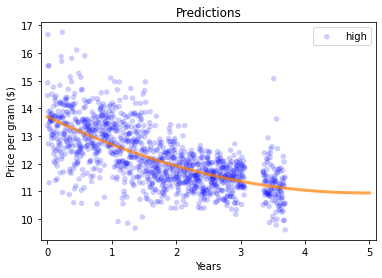

In [7]:
# solution: simple predictions- high

name = "high"
daily = dailies[name]

_, results = RunQuadraticModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

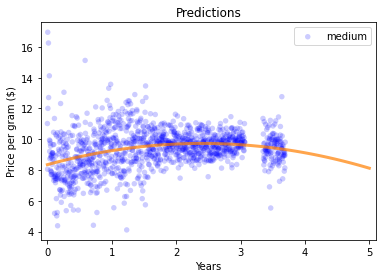

In [8]:
# solution: simple predictions- medium

name = "medium"
daily = dailies[name]

_, results = RunQuadraticModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

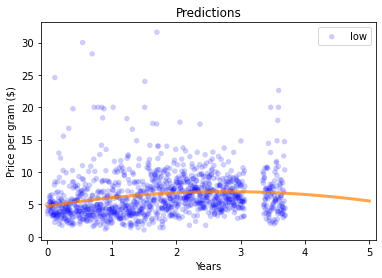

In [9]:
# solution: simple predictions- low

name = "low"
daily = dailies[name]

_, results = RunQuadraticModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

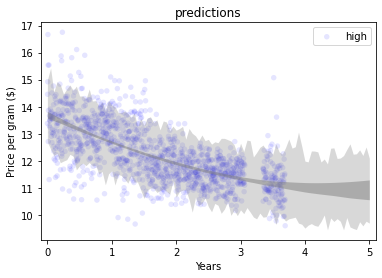

In [10]:
# solution: predictions with confidence interval- high

name = "high"
daily = dailies[name]

years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(
    title="predictions",
    xlabel="Years",
    xlim=[years[0] - 0.1, years[-1] + 0.1],
    ylabel="Price per gram ($)",
)

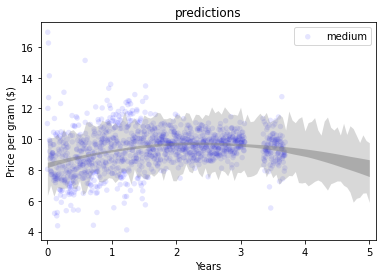

In [11]:
# solution: predictions with confidence interval- medium

name = "medium"
daily = dailies[name]
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(
    title="predictions",
    xlabel="Years",
    xlim=[years[0] - 0.1, years[-1] + 0.1],
    ylabel="Price per gram ($)",
)

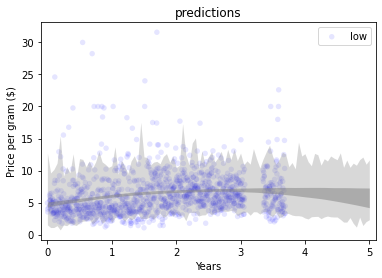

In [12]:
# solution: predictions with confidence interval- low

name = "low"
daily = dailies[name]
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(
    title="predictions",
    xlabel="Years",
    xlim=[years[0] - 0.1, years[-1] + 0.1],
    ylabel="Price per gram ($)",
)

# 12.2
Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from 'Hypotheses Test on page 102. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [13]:
# import chapter code

def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [14]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    # Tests serial correlations by permutation.

    def TestStatistic(self, data):
        # Computes the test statistic.
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        # Run the model of the null hypothesis.
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [15]:
# Solution: test the correlation between consecutive prices-  high

name = "high"
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.4852293761947381 0.0


In [18]:
# Solution: test the correlation between consecutive prices-  medium

name = "medium"
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.16006429989181092 0.0


In [23]:
# Solution: test the correlation between consecutive prices-  low

name = "low"
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.11657497441101057 0.0


In [24]:
# Solution: test for serial correlation in residuals of the quadratic model-  high

name = "high"
daily = dailies[name]

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.05607308161289924 0.046
